# pynoisy: Disk Model
---
This notebook plots the advection-diffusion matrices defined by the source C code [1]

The python wrapper pynoisy [2] is introduced and the parameters defined by the disk model (src/model_disk.c) are plotted. pynoisy has a modified verions of [1] which is used to define general matrices as inputs to the advection-diffusion solver. 

[1] https://github.com/AFD-Illinois/noisy

[2] https://github.com/aviadlevis/pynoisy

In [1]:
import pynoisy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# Change directory to pyshdom main directory
if os.getcwd().endswith('notebooks'):
    %cd '../'

/home/aviad/Code/noisy


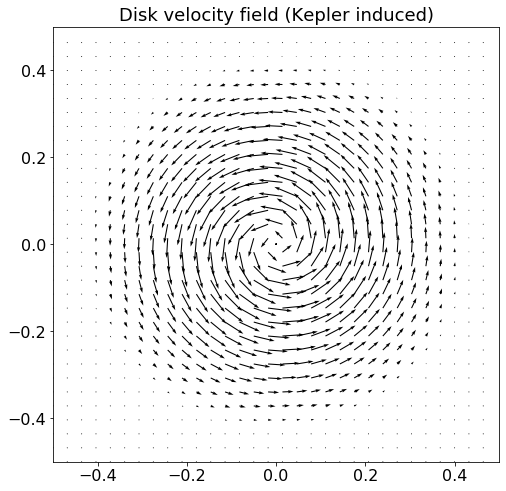

In [2]:
"""
Define a DiskAdvection object and plot the velocity vector field.
"""
advection = pynoisy.DiskAdvection(direction=pynoisy.RotationDirection.counter_clockwise)
%matplotlib inline
plt.figure(figsize=(8,8))
advection.plot_velocity()

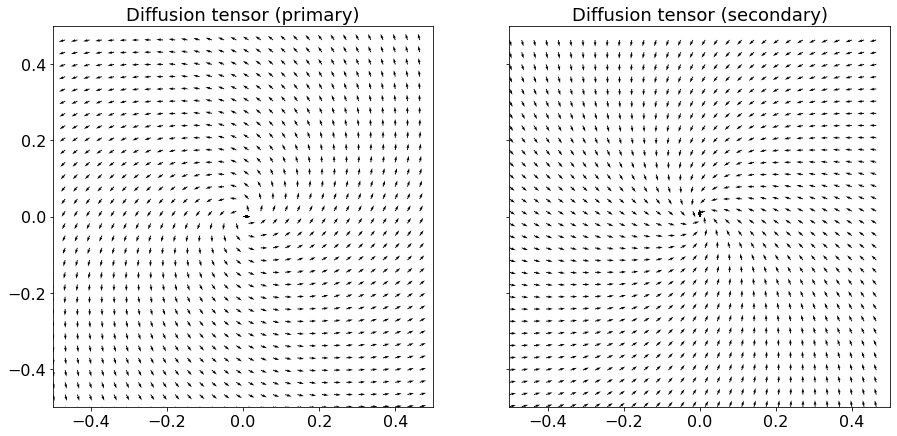

In [4]:
"""
Define a DiskDiffusion object and plot the principle axis of the diffusion tensor
"""
diffusion = pynoisy.DiskDiffusion()

%matplotlib inline
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,7))
plt.sca(ax[0])
diffusion.plot_principal_axis()
plt.sca(ax[1])
diffusion.plot_secondary_axis()

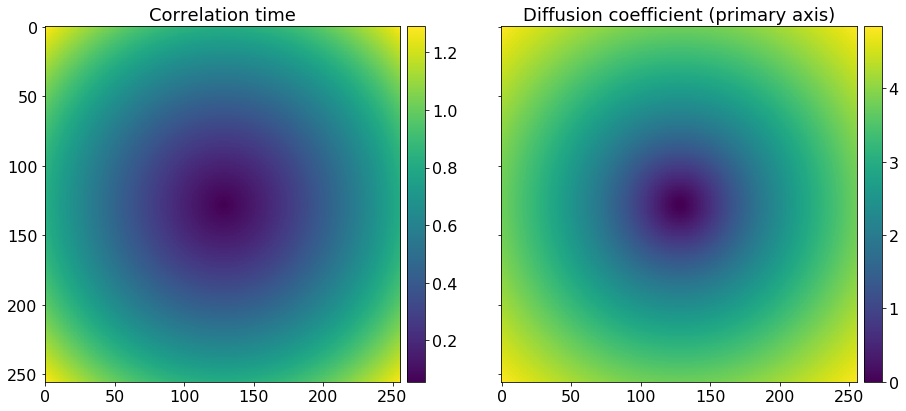

In [16]:
"""
Plot the correlation time and diffusion coefficient
"""
%matplotlib inline
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,7))
plt.sca(ax[0])
diffusion.imshow_correlation_time()
plt.sca(ax[1])
diffusion.imshow_diffusion_coefficient()

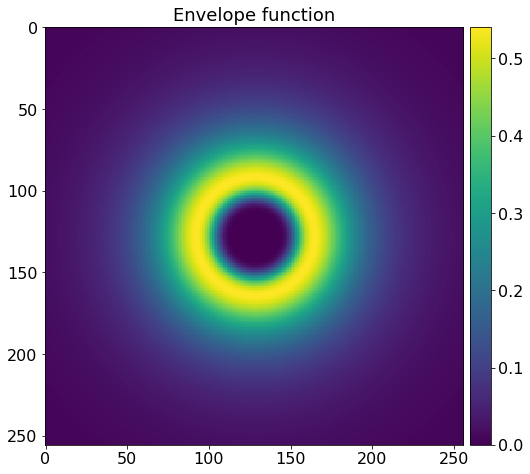

In [17]:
"""
Define and plot the disk envelope function.
The envelope multiplies the actual random fields to create synthetic plots of a "black hole"
"""
envelope = pynoisy.DiskEnvelope()
%matplotlib inline
plt.figure(figsize=(8,8))
envelope.imshow()

In [18]:
solver = pynoisy.PDESolver(advection, diffusion, envelope, forcing_strength=1.0)

In [ ]:
solver.run()